## Identify core of AW layer in each row

In [16]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gsw

In [17]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

Open theta datasets

In [18]:
theta_row000 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_row025 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_row050 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_row075 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_row100 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_row125 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

Open salinity datasets

In [19]:
salt_row000 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_row025 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_row050 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_row075 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_row100 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_row125 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

Calculate climatologies

In [20]:
## apply function to datasets

## theta
theta_row000_annual = theta_row000.mean('time')
theta_row025_annual = theta_row025.mean('time')
theta_row050_annual = theta_row050.mean('time')
theta_row075_annual = theta_row075.mean('time')
theta_row100_annual = theta_row100.mean('time')
theta_row125_annual = theta_row125.mean('time')
theta_row150_annual = theta_row150.mean('time')

## salinity
salt_row000_annual = salt_row000.mean('time')
salt_row025_annual = salt_row025.mean('time')
salt_row050_annual = salt_row050.mean('time')
salt_row075_annual = salt_row075.mean('time')
salt_row100_annual = salt_row100.mean('time')
salt_row125_annual = salt_row125.mean('time')
salt_row150_annual = salt_row150.mean('time')

In [21]:
## mask values that are not water (i.e., land mask)
## theta
theta_row000_annual = theta_row000_annual.where(salt_row000_annual.SALT>0)
theta_row025_annual = theta_row025_annual.where(salt_row025_annual.SALT>0)
theta_row050_annual = theta_row050_annual.where(salt_row050_annual.SALT>0)
theta_row075_annual = theta_row075_annual.where(salt_row075_annual.SALT>0)
theta_row100_annual = theta_row100_annual.where(salt_row100_annual.SALT>0)
theta_row125_annual = theta_row125_annual.where(salt_row125_annual.SALT>0)
theta_row150_annual = theta_row150_annual.where(salt_row150_annual.SALT>0)

## salinity
salt_row000_annual = salt_row000_annual.where(salt_row000_annual.SALT>0)
salt_row025_annual = salt_row025_annual.where(salt_row025_annual.SALT>0)
salt_row050_annual = salt_row050_annual.where(salt_row050_annual.SALT>0)
salt_row075_annual = salt_row075_annual.where(salt_row075_annual.SALT>0)
salt_row100_annual = salt_row100_annual.where(salt_row100_annual.SALT>0)
salt_row125_annual = salt_row125_annual.where(salt_row125_annual.SALT>0)
salt_row150_annual = salt_row150_annual.where(salt_row150_annual.SALT>0)

In [7]:
theta_row025_annual

<xarray.Dataset>
Dimensions:       (cols: 300, depth: 72)
Coordinates:
  * depth         (depth) float32 0.5 1.57 2.79 ... 2.281e+03 2.389e+03
Dimensions without coordinates: cols
Data variables:
    longitude     (cols, depth) float32 nan nan nan nan nan ... nan nan nan nan
    latitude      (cols, depth) float32 nan nan nan nan nan ... nan nan nan nan
    iter_numbers  (depth, cols) float64 nan nan nan nan nan ... nan nan nan nan
    years         (depth, cols) float64 nan nan nan nan nan ... nan nan nan nan
    months        (depth, cols) float64 nan nan nan nan nan ... nan nan nan nan
    days          (depth, cols) float64 nan nan nan nan nan ... nan nan nan nan
    THETA         (depth, cols) float32 nan nan nan nan nan ... nan nan nan nan

### Calculate density field

In [22]:
# calculate potential density - reference 1000 kgm^(-3)
density_row000_annual = gsw.density.sigma0(salt_row000_annual.SALT, theta_row000_annual.THETA)
density_row025_annual = gsw.density.sigma0(salt_row025_annual.SALT, theta_row025_annual.THETA)
density_row050_annual = gsw.density.sigma0(salt_row050_annual.SALT, theta_row050_annual.THETA)
density_row075_annual = gsw.density.sigma0(salt_row075_annual.SALT, theta_row075_annual.THETA)
density_row100_annual = gsw.density.sigma0(salt_row100_annual.SALT, theta_row100_annual.THETA)
density_row125_annual = gsw.density.sigma0(salt_row125_annual.SALT, theta_row125_annual.THETA)
density_row150_annual = gsw.density.sigma0(salt_row150_annual.SALT, theta_row150_annual.THETA)

### Identify core of AW layer

In [23]:
density_levels=[25.5,26,27,27.3,27.4,27.5]

I demarcate the AW with boxes (x,y bounds) based on theta and salt patterns and potential density limits (27.3-27.4 kgm^-3)

### Row 0

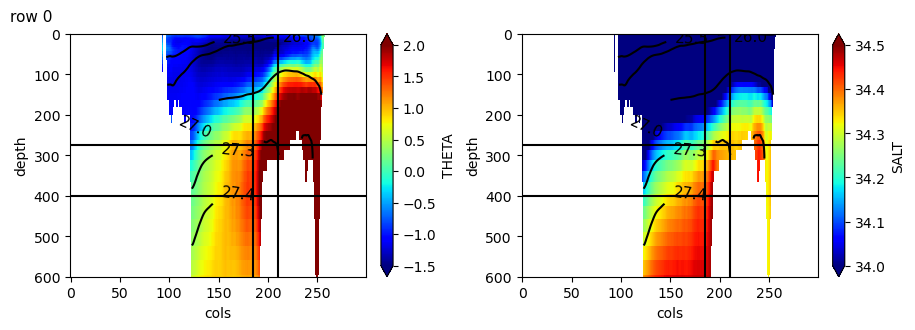

In [24]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2) = plt.subplots(1,2)
theta_row000_annual.THETA.plot(ax=ax1,cmap='jet',vmin=-1.5,vmax=2)
salt_row000_annual.SALT.plot(ax=ax2,cmap='jet',vmin=34,vmax=34.5)
plt.clabel(density_row000_annual.plot.contour(ax=ax1,colors='k',levels=density_levels), inline=True, fontsize=11)
plt.clabel(density_row000_annual.plot.contour(ax=ax2,colors='k',levels=density_levels), inline=True, fontsize=11)

for ax in (ax1,ax2):
    ax.set_ylim(600,0);
    ax.axhline(y=275,color='k')
    ax.axhline(y=400,color='k')
    ax.axvline(x=185,color='k')
    ax.axvline(x=210,color='k');
    
plt.suptitle("row 0",x=0, y=1.05, horizontalalignment='left', verticalalignment='top', fontsize = 11);

### Row 25

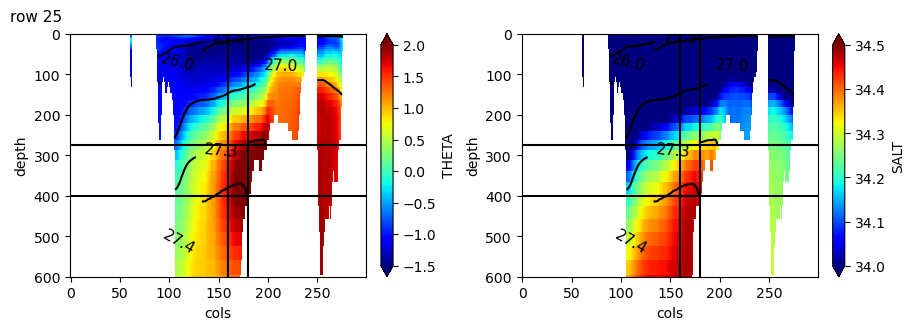

In [25]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2) = plt.subplots(1,2)
theta_row025_annual.THETA.plot(ax=ax1,cmap='jet',vmin=-1.5,vmax=2)
salt_row025_annual.SALT.plot(ax=ax2,cmap='jet',vmin=34,vmax=34.5)
plt.clabel(density_row025_annual.plot.contour(ax=ax1,colors='k',levels=density_levels), inline=True, fontsize=11)
plt.clabel(density_row025_annual.plot.contour(ax=ax2,colors='k',levels=density_levels), inline=True, fontsize=11)

for ax in (ax1,ax2):
    ax.set_ylim(600,0);
    ax.axhline(y=275,color='k')
    ax.axhline(y=400,color='k')
    ax.axvline(x=160,color='k')
    ax.axvline(x=180,color='k');
    
plt.suptitle("row 25",x=0, y=1.05, horizontalalignment='left', verticalalignment='top', fontsize = 11);

### Row 50

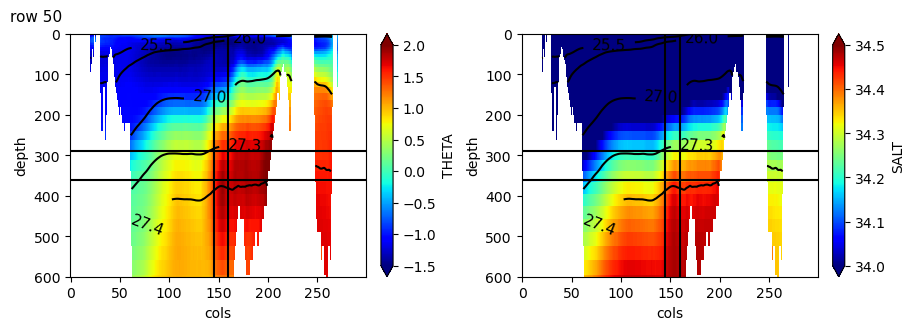

In [26]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2) = plt.subplots(1,2)
theta_row050_annual.THETA.plot(ax=ax1,cmap='jet',vmin=-1.5,vmax=2)
salt_row050_annual.SALT.plot(ax=ax2,cmap='jet',vmin=34,vmax=34.5)
plt.clabel(density_row050_annual.plot.contour(ax=ax1,colors='k',levels=density_levels), inline=True, fontsize=11)
plt.clabel(density_row050_annual.plot.contour(ax=ax2,colors='k',levels=density_levels), inline=True, fontsize=11)

for ax in (ax1,ax2):
    ax.set_ylim(600,0);
    ax.axhline(y=290,color='k')
    ax.axhline(y=360,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=160,color='k');
    
plt.suptitle("row 50",x=0, y=1.05, horizontalalignment='left', verticalalignment='top', fontsize = 11);

### Row 75

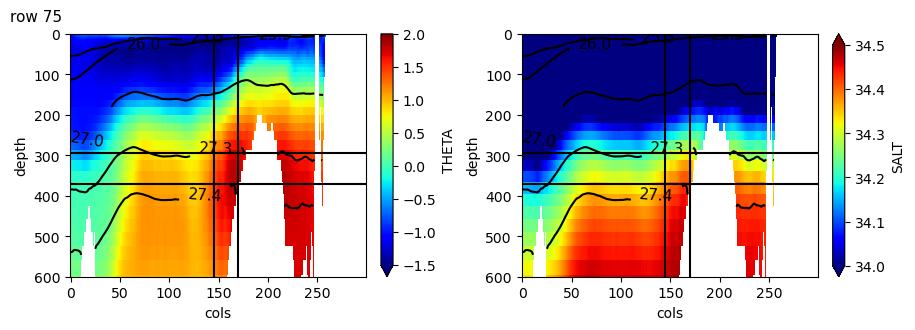

In [27]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2) = plt.subplots(1,2)
theta_row075_annual.THETA.plot(ax=ax1,cmap='jet',vmin=-1.5,vmax=2)
salt_row075_annual.SALT.plot(ax=ax2,cmap='jet',vmin=34,vmax=34.5)
plt.clabel(density_row075_annual.plot.contour(ax=ax1,colors='k',levels=density_levels), inline=True, fontsize=11)
plt.clabel(density_row075_annual.plot.contour(ax=ax2,colors='k',levels=density_levels), inline=True, fontsize=11)

for ax in (ax1,ax2):
    ax.set_ylim(600,0);
    ax.axhline(y=295,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=170,color='k');
    
plt.suptitle("row 75",x=0, y=1.05, horizontalalignment='left', verticalalignment='top', fontsize = 11);

### Row 100

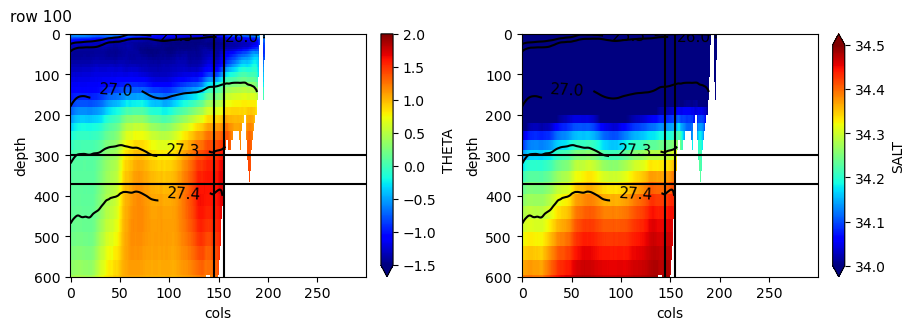

In [28]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2) = plt.subplots(1,2)
theta_row100_annual.THETA.plot(ax=ax1,cmap='jet',vmin=-1.5,vmax=2)
salt_row100_annual.SALT.plot(ax=ax2,cmap='jet',vmin=34,vmax=34.5)
plt.clabel(density_row100_annual.plot.contour(ax=ax1,colors='k',levels=density_levels), inline=True, fontsize=11)
plt.clabel(density_row100_annual.plot.contour(ax=ax2,colors='k',levels=density_levels), inline=True, fontsize=11)

for ax in (ax1,ax2):
    ax.set_ylim(600,0);
    ax.axhline(y=300,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=155,color='k');
    
plt.suptitle("row 100",x=0, y=1.05, horizontalalignment='left', verticalalignment='top', fontsize = 11);

### Row 125

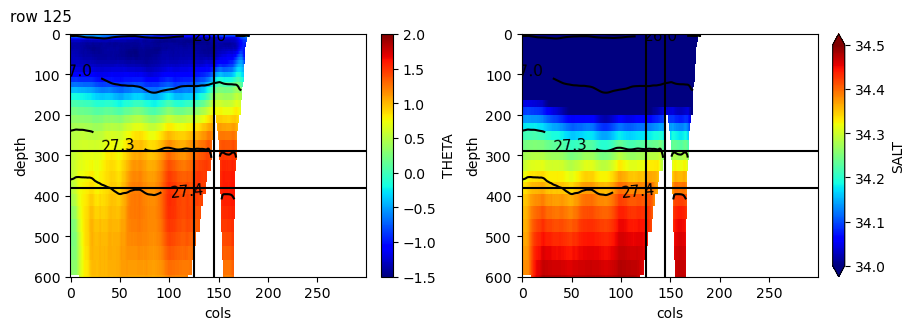

In [29]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2) = plt.subplots(1,2)
theta_row125_annual.THETA.plot(ax=ax1,cmap='jet',vmin=-1.5,vmax=2)
salt_row125_annual.SALT.plot(ax=ax2,cmap='jet',vmin=34,vmax=34.5)
plt.clabel(density_row125_annual.plot.contour(ax=ax1,colors='k',levels=density_levels), inline=True, fontsize=11)
plt.clabel(density_row125_annual.plot.contour(ax=ax2,colors='k',levels=density_levels), inline=True, fontsize=11)

for ax in (ax1,ax2):
    ax.set_ylim(600,0);
    ax.axhline(y=290,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=145,color='k');
    
plt.suptitle("row 125",x=0, y=1.05, horizontalalignment='left', verticalalignment='top', fontsize = 11);

### Row 150

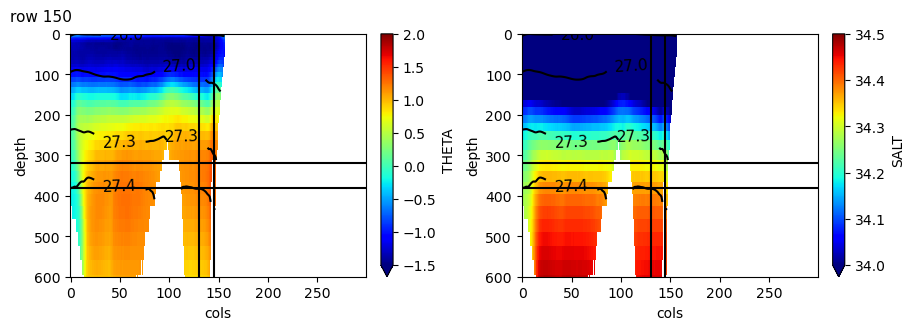

In [30]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2) = plt.subplots(1,2)
theta_row150_annual.THETA.plot(ax=ax1,cmap='jet',vmin=-1.5,vmax=2)
salt_row150_annual.SALT.plot(ax=ax2,cmap='jet',vmin=34,vmax=34.5)
plt.clabel(density_row150_annual.plot.contour(ax=ax1,colors='k',levels=density_levels), inline=True, fontsize=11)
plt.clabel(density_row150_annual.plot.contour(ax=ax2,colors='k',levels=density_levels), inline=True, fontsize=11)

for ax in (ax1,ax2):
    ax.set_ylim(600,0);
    ax.axhline(y=320,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=130,color='k')
    ax.axvline(x=145,color='k');
    
plt.suptitle("row 150",x=0, y=1.05, horizontalalignment='left', verticalalignment='top', fontsize = 11);